Importando Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

Escolhendo Ações da Carteira Teórica

In [ ]:
tickers = "ALPA4.SA BBAS3.SA CPFE3.SA HGTX3.SA SULA11.SA"
carteira = yf.download(tickers, period="5y")["Adj Close"]
ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
carteira

,ALPA4.SA,BBAS3.SA,CPFE3.SA,HGTX3.SA,SULA11.SA
Date,,,,,
2016-02-17,5.450922,10.706407,13.711164,6.765218,12.169334
2016-02-18,5.560672,10.313732,13.909281,6.765218,12.133859
2016-02-19,5.567988,10.425925,13.595597,6.765218,12.098375
2016-02-22,5.853338,10.906750,14.156923,6.765218,12.460262
2016-02-23,5.919188,10.834628,13.711164,6.765218,12.240293
...,...,...,...,...,...
2021-02-09,39.990002,34.279999,33.779999,17.219999,39.000000
2021-02-10,39.209999,33.810001,33.599998,16.879999,38.259998
2021-02-11,39.400002,33.939999,33.750000,17.090000,38.360001


Gráfico histórico das ações

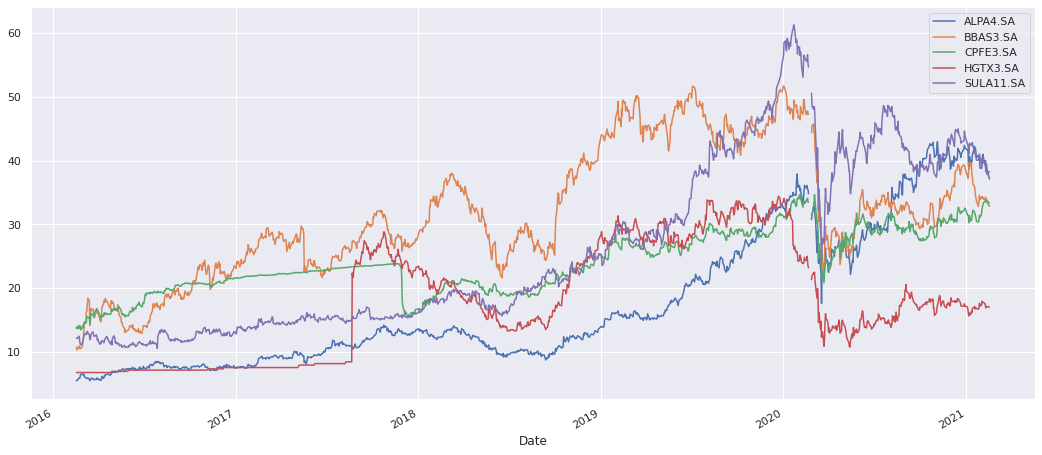

In [ ]:
sns.set()
carteira.plot(figsize=(18,8))

Carteira com saldo de R$ 10.000

In [ ]:
carteira_normalizada = (carteira/carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

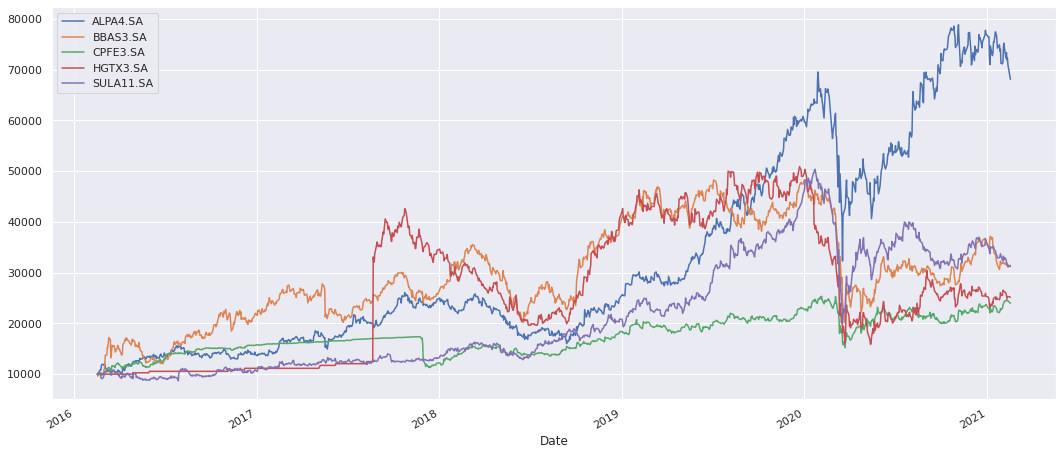

In [ ]:
carteira_normalizada.plot(figsize=(18,8))

Saldo da Carteira

In [ ]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)
carteira_normalizada

,ALPA4.SA,BBAS3.SA,CPFE3.SA,HGTX3.SA,SULA11.SA,saldo
Date,,,,,,
2016-02-17,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000
2016-02-18,10201.343474,9633.234136,10144.492689,10000.000000,9970.848257,49949.918556
2016-02-19,10214.765264,9738.024765,9915.713062,10000.000000,9941.690245,49810.193335
2016-02-22,10738.254446,10187.124532,10325.106464,10000.000000,10239.066392,51489.551834
2016-02-23,10859.059306,10119.761482,10000.000000,10000.000000,10058.308972,51037.129759
...,...,...,...,...,...,...
2021-02-09,73363.744861,32018.211228,24636.856222,25453.723231,32047.767512,187520.303053
2021-02-10,71932.789399,31579.224158,24505.576121,24951.152376,31439.680288,184408.422342
2021-02-11,72281.358793,31700.644218,24614.977133,25261.565113,31521.855931,185380.401188


In [ ]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2016-02-17     50000.000000
2016-02-18     49816.242704
2016-02-19     49894.309529
2016-02-22     51926.449040
2016-02-23     51068.914991
                  ...      
2021-02-09    143437.582571
2021-02-10    142237.755519
2021-02-11    143204.583123
2021-02-12    143061.660782
2021-02-17    144550.682259
Name: Adj Close, Length: 1237, dtype: float64

Comparando Carteira com o Ibovespa

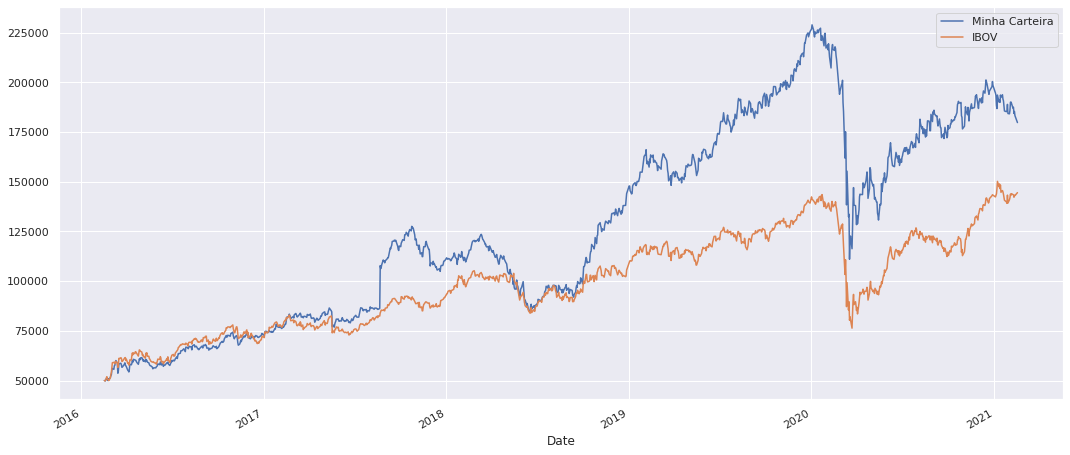

In [ ]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend();

Descrição da Carteira

In [ ]:
carteira_normalizada.describe()

,ALPA4.SA,BBAS3.SA,CPFE3.SA,HGTX3.SA,SULA11.SA,saldo
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000
mean,32024.900654,29639.492434,17458.014813,26076.721672,21345.981371,126545.110944
std,19565.600900,9382.491658,3504.004883,12796.565194,11003.143575,48745.102032
min,10000.000000,9633.234136,9807.345632,10000.000000,8672.840628,49810.193335
25%,17086.319440,23271.768776,15049.369147,11728.029600,12308.358970,82257.224903
50%,23592.079753,28133.713494,16907.208206,25158.095140,16182.547166,117989.881285
75%,46149.015200,36931.660063,20551.376562,37450.685950,32351.176351,169709.069574
max,78830.709525,48303.478178,25353.702439,50892.470100,50367.666651,228996.358253
